<h1>Auto sales data analysis</h1>

<h4>Importing Libraries</h4> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data from the csv file

In [2]:
df=pd.read_csv('Auto Sales data.csv')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24-02-2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07-05-2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01-07-2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25-08-2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28-10-2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


Removing unwanted columns to make the data more readable.

In [3]:
df=df.drop(["PHONE","CONTACTLASTNAME","CONTACTFIRSTNAME","ADDRESSLINE1"],axis=1)

About the data

In [4]:
df.shape

(2747, 16)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098952,42.042549,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  CITY                  2747 non-null   object 
 13  POSTALCODE            2747 non-null   object 
 14  COUNTRY               2747 non-null   object 
 15  DEALSIZE             

Checking  for null and duplicates as part of data cleaning process

In [7]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
DEALSIZE                0
dtype: int64

In [8]:
df.duplicated().sum()

0

<h4>What kind of product are most sold? </h4>

In [10]:
Prod_stats = df.groupby('PRODUCTLINE').agg({'SALES':'sum', 'ORDERNUMBER': 'count'})
Prod_stats['AVG_SALES'] = Prod_stats['SALES'] / Prod_stats['ORDERNUMBER']
Prod_stats

,SALES,ORDERNUMBER,AVG_SALES
PRODUCTLINE,,,
Classic Cars,3842868.54,949,4049.387292
Motorcycles,1103512.19,313,3525.598051
Planes,969323.42,304,3188.563882
Ships,700039.22,230,3043.648783
Trains,226243.47,77,2938.226883
Trucks and Buses,1111559.19,295,3767.997254
Vintage Cars,1806675.68,579,3120.337962


Conclusion:Classic cars have most sales out of all productlines hence being in most demand.

In What Quantity are the customers order the products most times ?

<Axes: xlabel='SALES', ylabel='QUANTITYORDERED'>

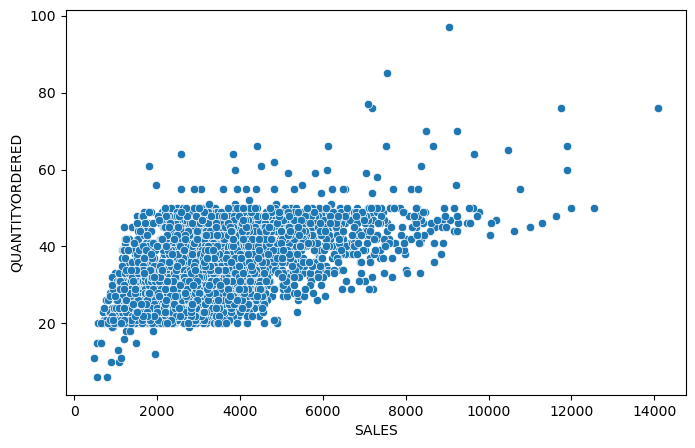

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SALES',
               y='QUANTITYORDERED',
               data=df)

c:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


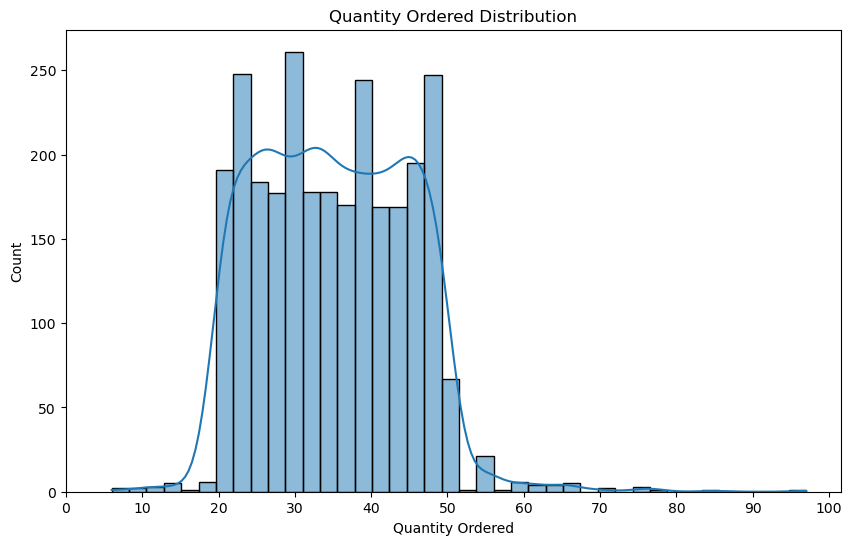

In [12]:
plt.figure(figsize= (10,6))
sns.histplot(df['QUANTITYORDERED'], kde=True)
plt.title('Quantity Ordered Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Count')
plt.xticks(range(0,101,10))
plt.show()

Conclusion: Most customers chose to buy in quanties between 20 to 50 items,while rarely some buy above 50 items in Quantity.

Sales distribution by each country.

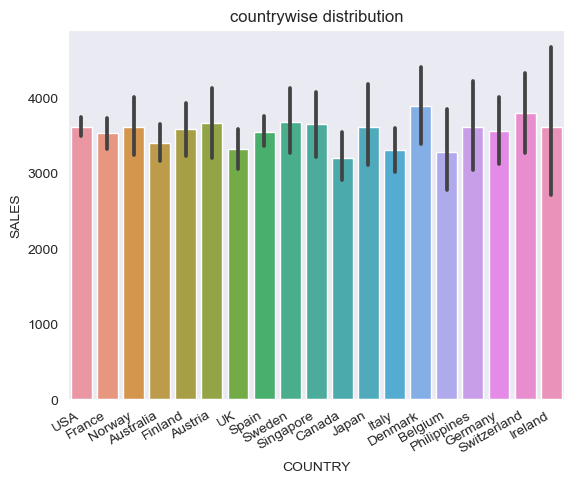

In [13]:
sns.set_style('dark')
sns.barplot(x="COUNTRY", y="SALES", data=df)
plt.title('countrywise distribution')
plt.xticks(rotation=30,ha='right')
plt.show()

Which cities tops in sales numbers?

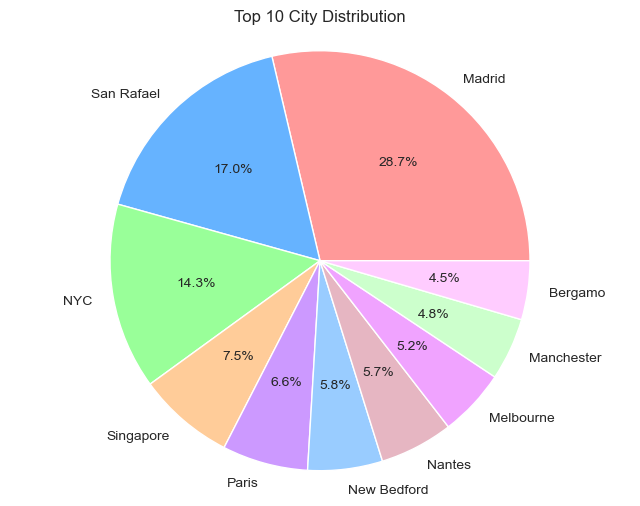

In [14]:
city_counts = df['CITY'].value_counts()
sorted = city_counts.sort_values(ascending=False)

labels = sorted.index[:10]
sizes = sorted[:10].values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#cc99ff', '#99ccff', '#e6b6c2', '#f0a3ff', '#ccffcc', '#ffccff']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors,autopct='%.1f%%')
plt.axis('equal')
plt.title('Top 10 City Distribution')
plt.show()


Conclusion: New York,San Rafael and Madrid Tops Sales among the top 10 

Which countries top in sales?

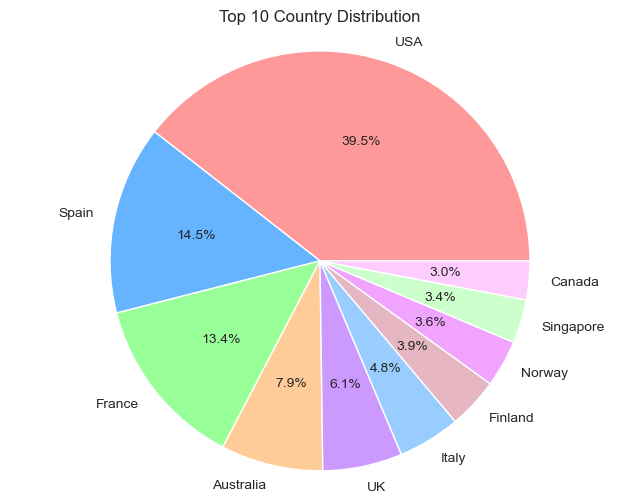

In [15]:
city_counts = df['COUNTRY'].value_counts()
sorted = city_counts.sort_values(ascending=False)

labels = sorted.index[:10]
sizes = sorted[:10].values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#cc99ff', '#99ccff', '#e6b6c2', '#f0a3ff', '#ccffcc', '#ffccff']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors,autopct='%.1f%%')
plt.axis('equal')
plt.title('Top 10 Country Distribution')
plt.show()

Conclusion: USA tops in sales along with Spain and France among the top 10

c:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


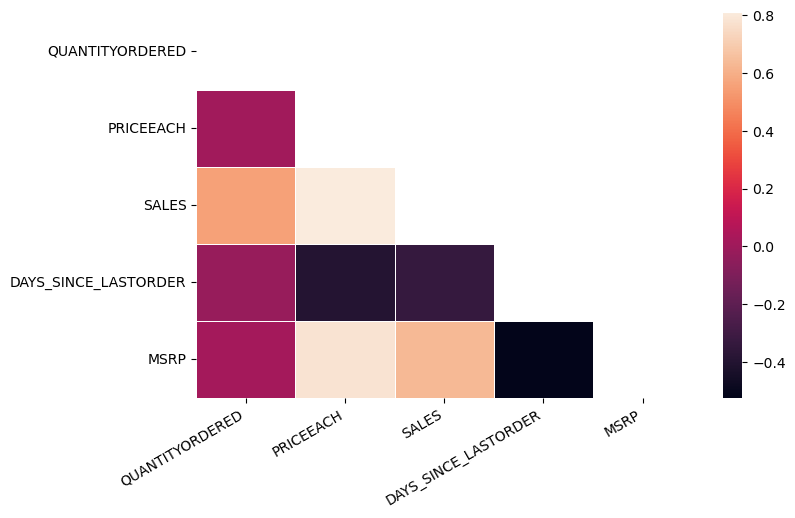

In [11]:
import numpy as np
df_num = df.select_dtypes([int,float]).drop(['ORDERNUMBER','ORDERLINENUMBER'],axis=1)
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,mask=mask,fmt='.2f',linewidth=0.5)
plt.xticks(rotation=30,ha='right')
plt.show()

<ul>
<li>Prices and Quantity of ordered items influence sales since there is a high corelation between them </li>
<li>It looks like there is a high corelation between Manufacturers recommended price (msrp) and actual selling price indicating that actual selling price is closely aligned with manufacturers recommendation </li>
</ul>


Checking the Sales Trend and analysing how good sales are through the years(Yearly,Quaterly etc.)

In [17]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Quarter'] = df['ORDERDATE'].dt.quarter


C:\Users\user\AppData\Local\Temp\ipykernel_7704\612591132.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


Annual Sales Trend

c:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


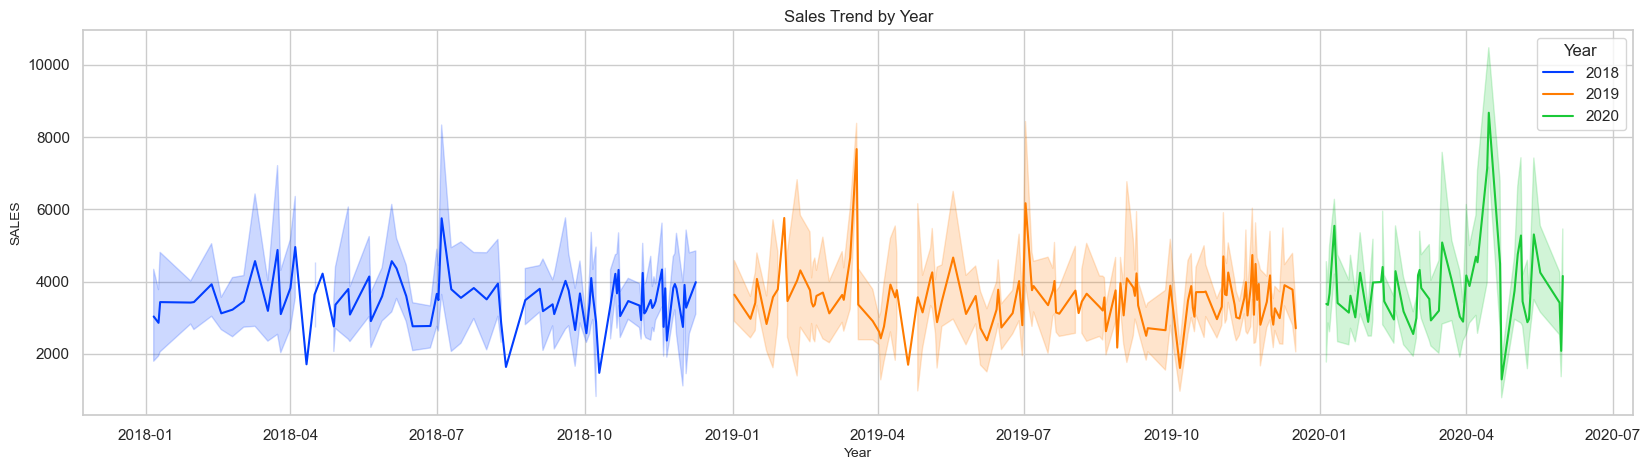

In [18]:
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES",hue="Year",palette=sns.color_palette("bright", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

Quarterly Sales Trend

c:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


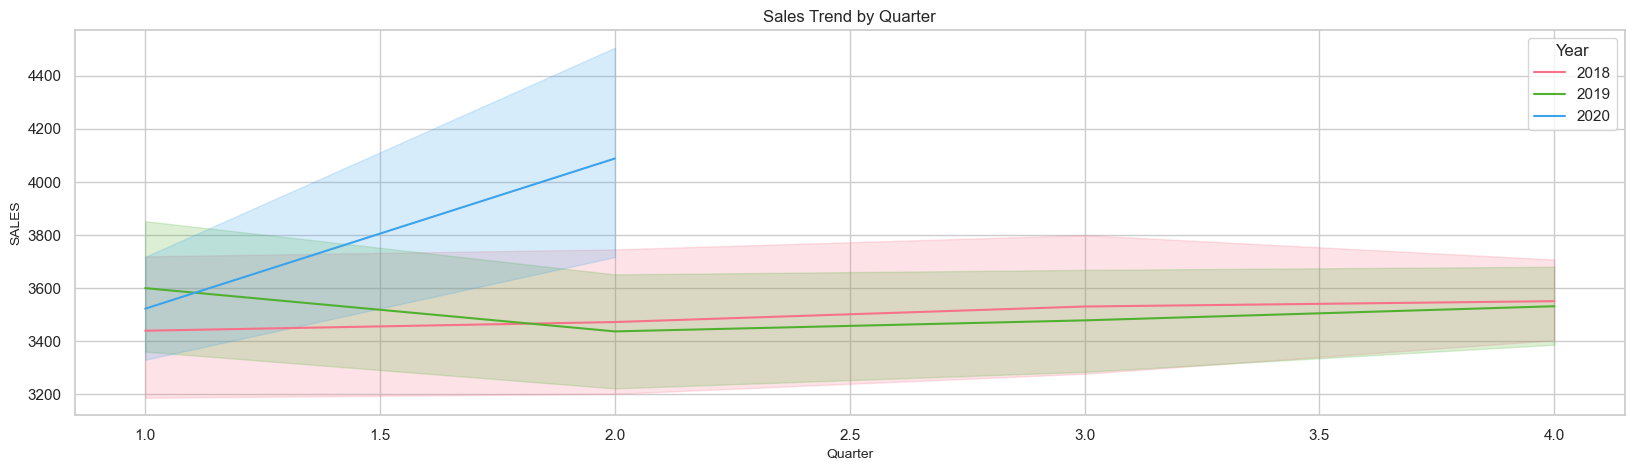

In [19]:
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Quarter", y="SALES", hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

Monthly Sales Trend

c:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


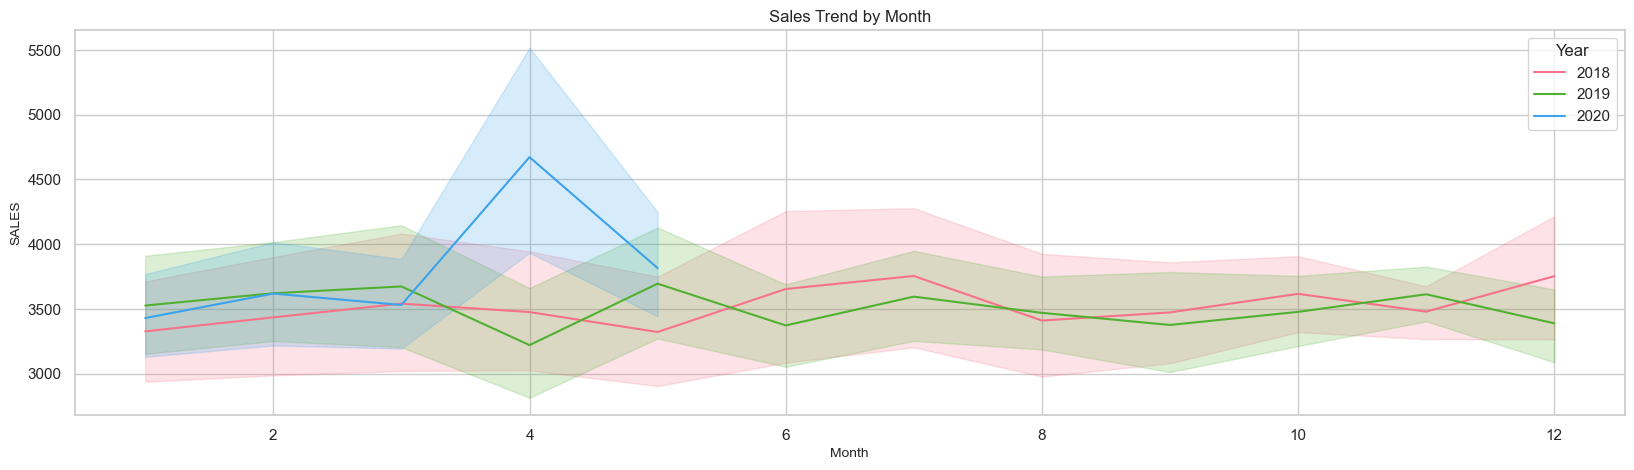

In [20]:
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES",hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

<ul>
   <h4>Conclusions</h4>
  <li>Comparing to previous years 2020 has seen a high rise in sales numbers and 2018 has been the lowest in terms of sales</li>
  <li>Even though sales are high in 2020 its only during the early months lowers during the second and from 2nd half of 3rd quarter till year end(sales improve during 1st half of the 2nd quarter also)</li>
</ul>

What Size of orders gets mostly cancelled?

In [21]:
d1=df.loc[(df['STATUS']=='Cancelled')&(df['DEALSIZE']=='Large'),['STATUS','DEALSIZE']]
d1

,STATUS,DEALSIZE


In [22]:
d2=df.loc[(df['STATUS']=='Cancelled')&(df['DEALSIZE']=='Medium'),['STATUS','DEALSIZE']]
len(d2)

33

In [23]:
d2

,STATUS,DEALSIZE
103,Cancelled,Medium
161,Cancelled,Medium
387,Cancelled,Medium
439,Cancelled,Medium
513,Cancelled,Medium
531,Cancelled,Medium
538,Cancelled,Medium
610,Cancelled,Medium
834,Cancelled,Medium
902,Cancelled,Medium


In [24]:
d3=df.loc[(df['STATUS']=='Cancelled')&(df['DEALSIZE']=='Small'),['STATUS','DEALSIZE']]
len(d3)

27

In [25]:
d3

,STATUS,DEALSIZE
108,Cancelled,Small
286,Cancelled,Small
336,Cancelled,Small
584,Cancelled,Small
907,Cancelled,Small
908,Cancelled,Small
1691,Cancelled,Small
1697,Cancelled,Small
1744,Cancelled,Small
1764,Cancelled,Small


Conclusion: Medium sized deals gets cancelled mostly

How much of high amount orders gets cancelled for the last 3 years?

In [26]:
cancel=df.loc[(df['SALES']>=5000)&(df['STATUS']=='Cancelled'),['SALES','STATUS']]
cancel

,SALES,STATUS
103,5924.16,Cancelled
531,5763.72,Cancelled
538,6567.96,Cancelled
834,5177.04,Cancelled
995,6773.60,Cancelled
1035,5082.42,Cancelled
1547,6960.48,Cancelled
1917,5148.00,Cancelled


Out of all the high amount orders only 8 of them get cancelled